In [1]:
from covid19dh import covid19
import covsirphy as cs
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
os.makedirs("results/", exist_ok = True)

In [3]:
data_loader     = cs.DataLoader("input")
# (Main) Data
jhu_data        = data_loader.jhu(verbose = False)
jhu_data.records(country = "Italy")
# (Main) Population in each country
population_data = data_loader.population()

In [4]:
National_scenario = cs.Scenario(jhu_data, population_data, country="Italy", province= None, tau=1440)
# Fix the first date of records
National_scenario.first_date = "24Mar2020"
# Fix the last date of records
National_scenario.last_date = "08Jan2021"

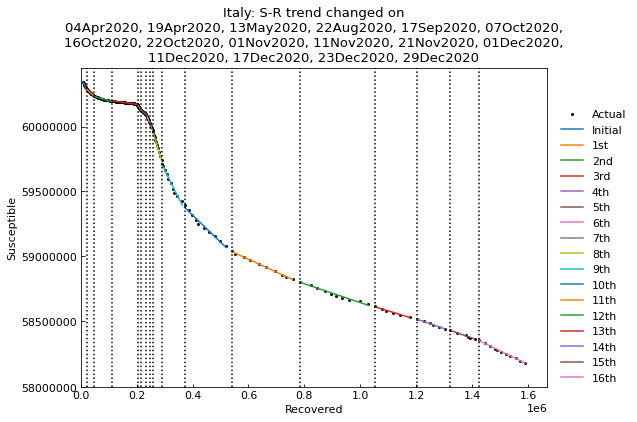

,Type,Start,End,Population
0th,Past,24Mar2020,03Apr2020,60421760
1st,Past,04Apr2020,18Apr2020,60421760
2nd,Past,19Apr2020,12May2020,60421760
3rd,Past,13May2020,21Aug2020,60421760
4th,Past,22Aug2020,16Sep2020,60421760
5th,Past,17Sep2020,06Oct2020,60421760
6th,Past,07Oct2020,15Oct2020,60421760
7th,Past,16Oct2020,21Oct2020,60421760
8th,Past,22Oct2020,31Oct2020,60421760
9th,Past,01Nov2020,10Nov2020,60421760


In [5]:
# cs.ChangeFinder(National_scenario.records(), max_rmsle=0.02)
National_scenario.trend()
National_scenario.summary()

In [6]:
# Estimate common parameters of SEWIR-F model with SIR-F model
# i.e. all parameters except for rho1, rho2, rho3
param_dict = {}

for phase in National_scenario.summary(name="Main").index:
    # Please adjust timeout for your PC (180 sec as default)
    National_scenario.estimate(cs.SIRF, phases=[phase], name="Main", timeout=360)
    param_dict[phase] = {
        p: National_scenario.get(p, phase=phase, name="Main")
        for p in cs.SIRF.PARAMETERS
    }


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (24Mar2020 - 03Apr2020): finished 1954 trials in 6 min  4 sec
Completed optimization. Total: 6 min  6 sec

<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 1st phase (04Apr2020 - 18Apr2020): finished 1960 trials in 6 min  5 sec
Completed optimization. Total: 6 min  6 sec

<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 2nd phase (19Apr2020 - 12May2020): finished 1943 trials in 6 min  4 sec
Completed optimization. Total: 6 min  6 sec

<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 3rd phase (13May2020 - 21Aug2020): finished 1910 trials in 6 min  4 sec
Completed optimization. Total: 6 min  6 sec

<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (22Aug2020 - 16Sep2020): finished  157 trials in 0 min 20 sec
Completed optimization. Total: 0 min 20 sec

<SIR-F model: parameter estimation>
Running 

In [9]:
param_dict

{'0th': {'theta': 0.14834183246697263,
  'kappa': 0.00031600668901514515,
  'rho': 0.07972431080087661,
  'sigma': 0.01630542709917479},
 '1st': {'theta': 0.1541122963536765,
  'kappa': 1.4664829272883172e-06,
  'rho': 0.03878329282056236,
  'sigma': 0.016666040452564836},
 '2nd': {'theta': 0.11659193460858547,
  'kappa': 0.001205473406291973,
  'rho': 0.020120964937887915,
  'sigma': 0.025953443828651446},
 '3rd': {'theta': 0.11656561650164862,
  'kappa': 0.00027423069842609195,
  'rho': 0.01121777642924678,
  'sigma': 0.033523745341309454},
 '4th': {'theta': 0.0008679217937994574,
  'kappa': 7.929718659295667e-05,
  'rho': 0.046757006857133666,
  'sigma': 0.013074103442204343},
 '5th': {'theta': 0.0004951258519502903,
  'kappa': 0.0003438577778866689,
  'rho': 0.03833924305587655,
  'sigma': 0.019460131199509838},
 '6th': {'theta': 0.000947923251068572,
  'kappa': 0.0005561677170367193,
  'rho': 0.07198324942306261,
  'sigma': 0.015381945204975975},
 '7th': {'theta': 0.00065299890156

In [7]:
df = National_scenario.summary(name="Main")
phases = df.index.tolist()
end_dates = df["End"].tolist()
# Clear phase information including used ODE models for all phases
National_scenario.clear(name="Main", include_past=True)

# Estimate parameters of SEWIR-F model with pre-estimated parameter values
for (phase, end_date) in zip(phases, end_dates):
    # Set pre-estimated parameter values
    National_scenario.add(end_date=end_date, **param_dict[phase])
    # Please adjust timeout for your PC (180 sec as default)
    National_scenario.estimate(cs.SEWIRF, phases=[phase], name="Main", timeout=360)


<SEWIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (24Mar2020 - 03Apr2020): finished 1587 trials in 6 min  6 sec
Completed optimization. Total: 6 min  7 sec

<SEWIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 1st phase (04Apr2020 - 18Apr2020): finished 4065 trials in 6 min  3 sec
Completed optimization. Total: 6 min  4 sec

<SEWIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 2nd phase (19Apr2020 - 12May2020): finished 3927 trials in 6 min  3 sec
Completed optimization. Total: 6 min  4 sec

<SEWIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 3rd phase (13May2020 - 21Aug2020): finished 3224 trials in 6 min  4 sec
Completed optimization. Total: 6 min  5 sec

<SEWIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (22Aug2020 - 16Sep2020): finished 3935 trials in 6 min  3 sec
Completed optimization. Total: 6 min  5 sec

<SEWIR-F model: parameter estimati

In [8]:
## Default value of timeout is 180 sec
# snl.estimate(cs.SIRF, timeout=60)
#if timeout 1440, it means 24 minutes!
National_scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho1,rho2,...,tau,1/alpha2 [day],1/gamma [day],1/beta1 [day],alpha1 [-],1/beta3 [day],1/beta2 [day],RMSLE,Trials,Runtime
0th,Past,24Mar2020,03Apr2020,60421760,SEWIR-F,7.34,0.153061,0.000625,0.112807,0.78416,...,1440,1601,63,8,0.153,1,1,0.077526,1587,6 min 6 sec
1st,Past,04Apr2020,18Apr2020,60421760,SEWIR-F,7.15,0.154112,0.000001,0.112807,0.78416,...,1440,681903,60,8,0.154,1,1,0.256052,4065,6 min 3 sec
2nd,Past,19Apr2020,12May2020,60421760,SEWIR-F,4.58,0.116592,0.001205,0.112807,0.78416,...,1440,829,38,8,0.117,1,1,0.609467,3927,6 min 3 sec
3rd,Past,13May2020,21Aug2020,60421760,SEWIR-F,3.68,0.116566,0.000274,0.112807,0.78416,...,1440,3646,29,8,0.117,1,1,3.285489,3224,6 min 4 sec
4th,Past,22Aug2020,16Sep2020,60421760,SEWIR-F,10.70,0.000868,0.000079,0.112807,0.78416,...,1440,12610,76,8,0.001,1,1,0.336820,3935,6 min 3 sec
5th,Past,17Sep2020,06Oct2020,60421760,SEWIR-F,7.11,0.000495,0.000344,0.112807,0.78416,...,1440,2908,51,8,0.000,1,1,0.316604,3964,6 min 3 sec
6th,Past,07Oct2020,15Oct2020,60421760,SEWIR-F,8.83,0.000948,0.000556,0.112807,0.78416,...,1440,1798,65,8,0.001,1,1,0.035962,4110,6 min 3 sec
7th,Past,16Oct2020,21Oct2020,60421760,SEWIR-F,10.74,0.000653,0.000080,0.112807,0.78416,...,1440,12524,76,8,0.001,1,1,0.067004,4172,6 min 3 sec
8th,Past,22Oct2020,31Oct2020,60421760,SEWIR-F,10.86,0.000171,0.000620,0.112807,0.78416,...,1440,1612,81,8,0.000,1,1,0.087340,4085,6 min 3 sec
9th,Past,01Nov2020,10Nov2020,60421760,SEWIR-F,10.49,0.000951,0.000645,0.112807,0.78416,...,1440,1551,78,8,0.001,1,1,0.040543,4093,6 min 3 sec


In [9]:
actual_filename = 'results/RASP_Italy_SEWIR_v2.csv'
National_scenario.summary().to_csv(actual_filename, index = False)

# Plot

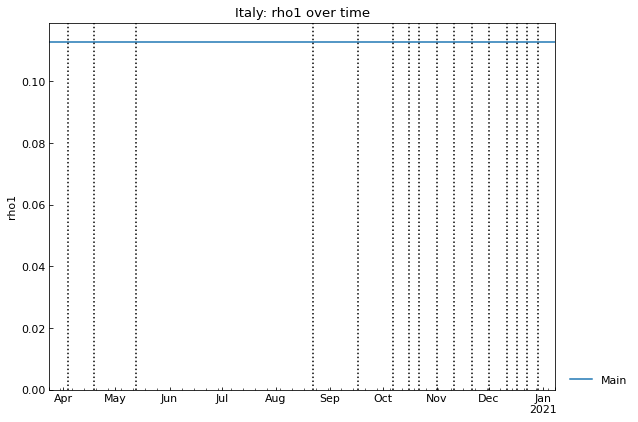

In [10]:
_ = National_scenario.history(target="rho1")

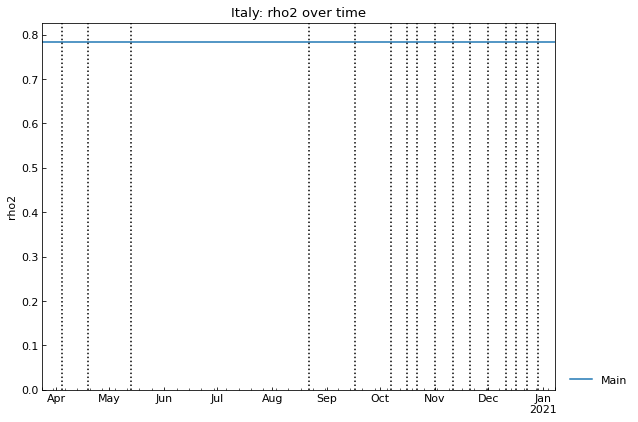

In [11]:
_ = National_scenario.history(target="rho2")

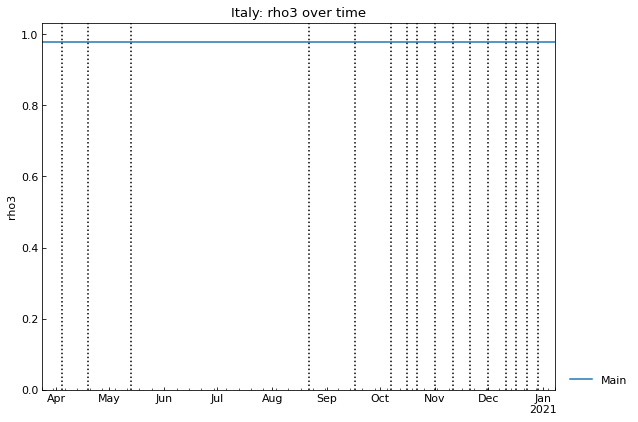

In [12]:
_ = National_scenario.history(target="rho3")

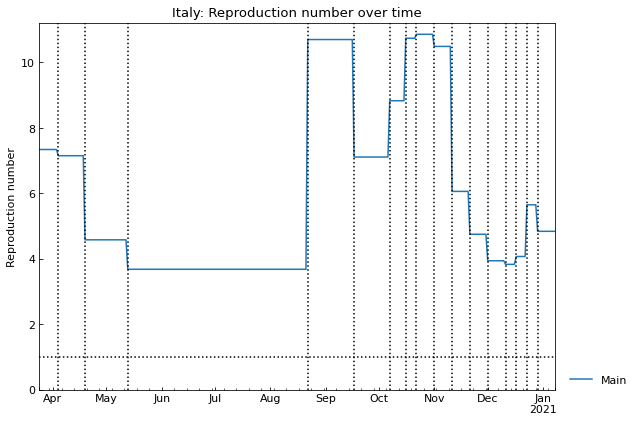

In [13]:
_ = National_scenario.history(target="Rt")

# Region!

In [ ]:
data            = pd.read_csv("input/covid19dh.csv", low_memory = False)
data_italy      = data[data.ISO3 == 'ITA']
provinces_list  = data_italy.loc[:,"Province/State"].dropna().unique().tolist()

actual_filename = 'results/Italy_SEWIRF.csv'

#create an empty dictionary to access the nameof the region given the key and the list of scenarios.
#key equal to zero corresponds to italian data
csv_filenames_SEWIRF  = []
csv_filenames_SEWIRF.append(actual_filename)

scenarios_list_SEWIRF = []
scenarios_list_SEWIRF.append(National_scenario)

province_dict = {}
province_dict.update({0 : "Italy"})

for i, province in enumerate(provinces_list):
    province_dict.update({i+1 : province})
    scenarios_list_SEWIRF.append(cs.Scenario(jhu_data, population_data, country="Italy",
                                      province = province, tau=1440))

In [ ]:
#skip the number "0" that is italy
for i, scenario in enumerate(scenarios_list_SEWIRF[1:]):
    #index that can access the dictionary for the regions is shifted by 1
    index = i + 1
    actual_province = province_dict.get(index)
    print("\nNow dealing with data of: ", actual_province)
    print("Step: ", index, "/", len(scenarios_list_SEWIRF) - 1)
    
    # Fix the first date of records
    scenario.first_date = "24Mar2020"
    # Fix the last date of records
    scenario.last_date = "08Jan2021"
    scenario.trend(set_phases=True)
    scenario.estimate(cs.SEWIRF, timeout = 360)
    
    actual_filename = 'results/RASP_'+actual_province+'_SEWIRF.csv'
    csv_filenames_SEWIRF.append(actual_filename)
    scenario.summary().to_csv(actual_filename, index = False)